# Dataset 3

## https://archive.ics.uci.edu/dataset/174/parkinsons

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../Dataframes/dataset3.csv')
data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [3]:
data.shape

(5875, 22)

In [4]:
total_UPDRS_threshold = 50
motor_UPDRS_threshold = 30

data['Status'] = ((data['total_UPDRS'] >= total_UPDRS_threshold) | (data['motor_UPDRS'] >= motor_UPDRS_threshold)).astype(int)


[]

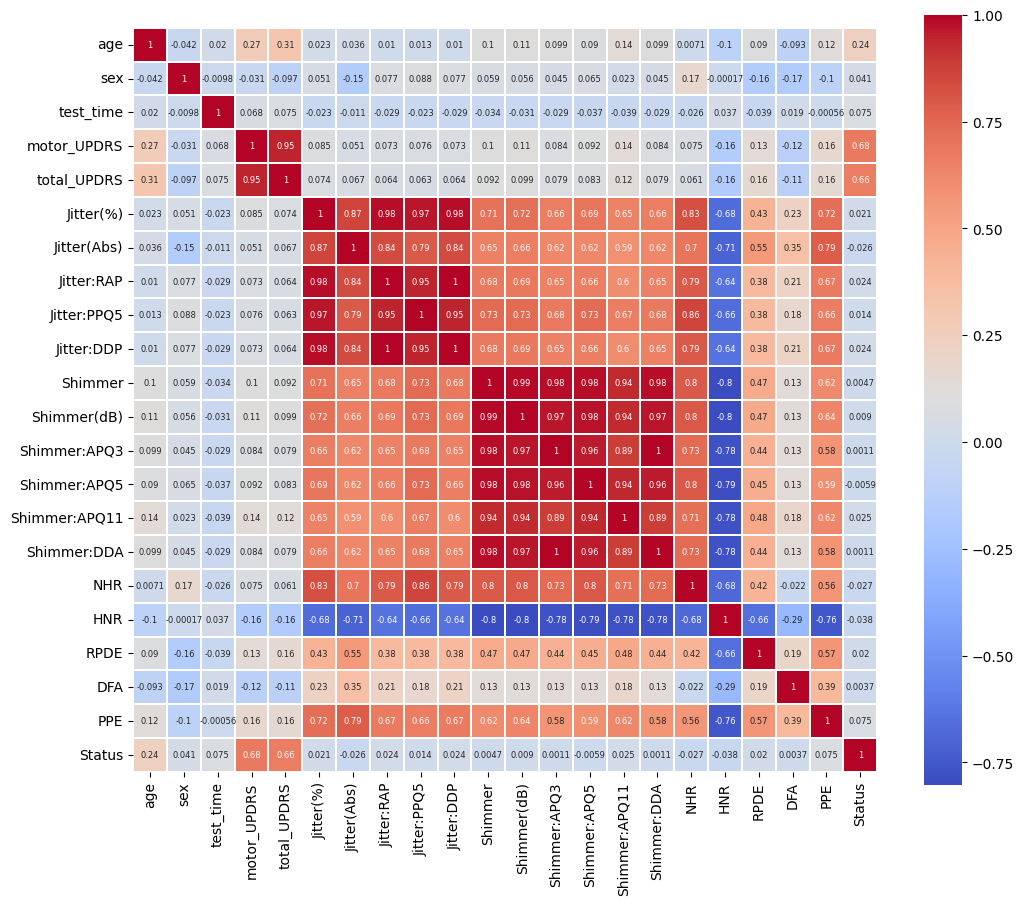

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.drop(['subject#'], axis = 1).corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, cmap = 'coolwarm', square=True, linewidths=0.1, annot=True, annot_kws={"size": 6})
plt.plot()

## XGBoost

In [5]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
data3 = data.copy()
data3 = data3.drop(['subject#', 'test_time'], axis = 1)

In [7]:
X = data3.drop(['total_UPDRS', 'motor_UPDRS', 'total_UPDRS'], axis = 1)
y = data3['Status']

X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 45)

XGB_classifier = XGBClassifier(random_state=45)

XGB_classifier.fit(X_train, y_train)

y_pred1 = XGB_classifier.predict(X_test)

accuracy = accuracy_score(y_test1, y_pred1)
print(f'Accuracy of the XGBoost Classifier: {accuracy:.2f}')

Accuracy of the XGBoost Classifier: 1.00


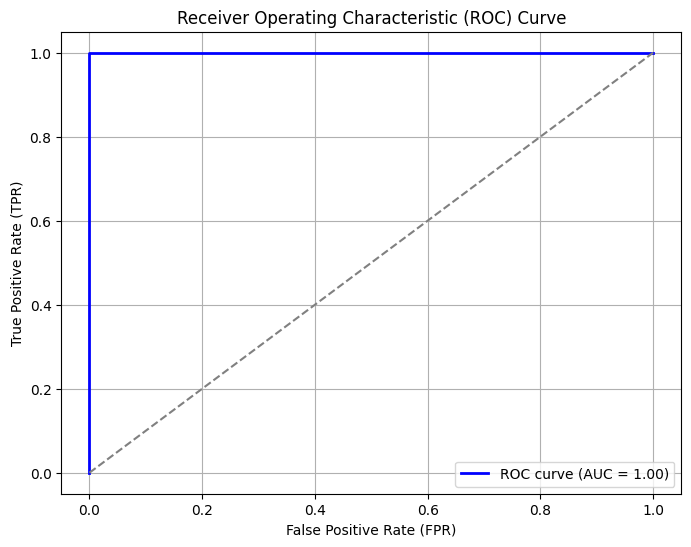

In [8]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


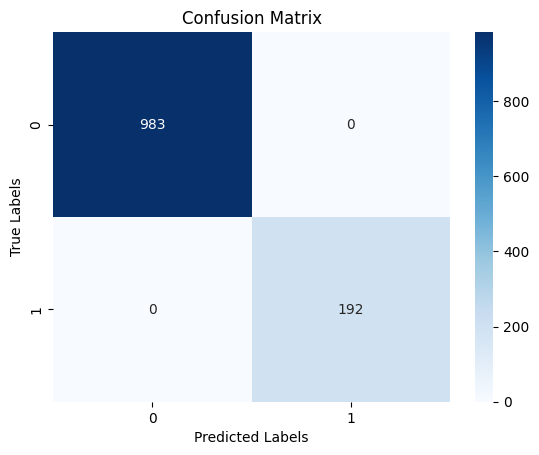

Confusion Matrix:
 [[983   0]
 [  0 192]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00       192

    accuracy                           1.00      1175
   macro avg       1.00      1.00      1.00      1175
weighted avg       1.00      1.00      1.00      1175



In [9]:
conf_matrix = confusion_matrix(y_test1, y_pred1)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test1, y_pred1)
print("Classification Report:\n", class_report)

<Figure size 3000x3000 with 0 Axes>

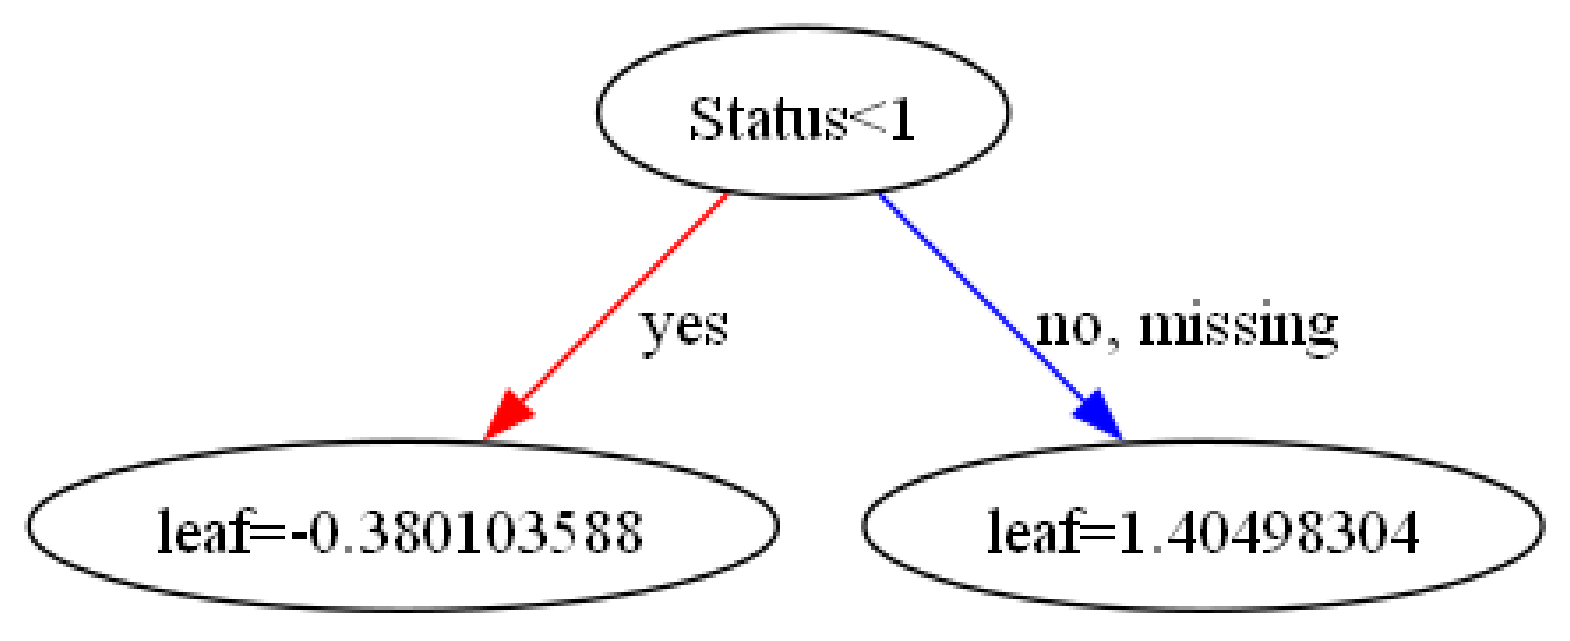

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import xgboost as xgb

plt.figure(figsize=(30, 30))
xgb.plot_tree(XGB_classifier)

fig = plt.gcf()
fig.set_size_inches(20, 15)

plt.show()

## Support Vector Machine

In [10]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
data3 = data.copy()
data3 = data3.drop(['subject#', 'test_time'], axis = 1)

### Linear

In [12]:
X = data3.drop(['total_UPDRS', 'motor_UPDRS', 'total_UPDRS'], axis = 1)
y = data3['Status']

X_train, X_test, y_train, y_test21 = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'linear')

SVM_classifier.fit(X_train, y_train)

y_pred21 = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test21, y_pred21)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 1.00


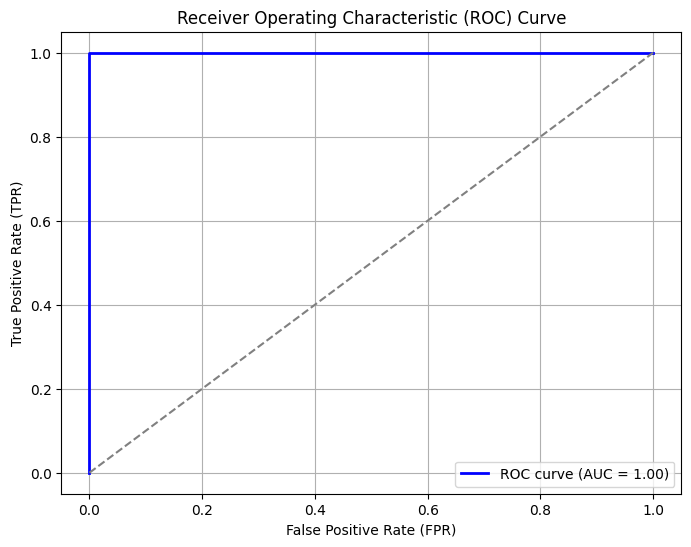

In [13]:
fpr, tpr, thresholds = roc_curve(y_test21, y_pred21)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


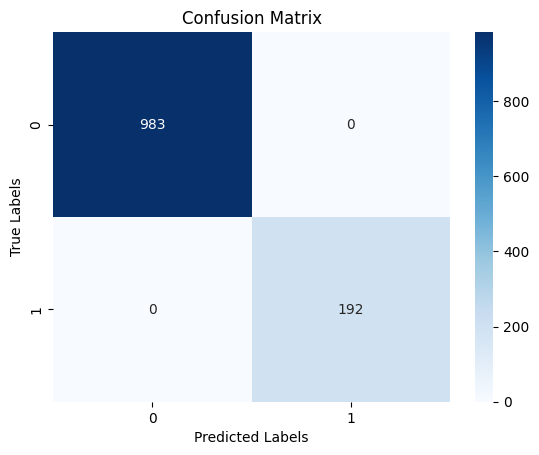

Confusion Matrix:
 [[983   0]
 [  0 192]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00       192

    accuracy                           1.00      1175
   macro avg       1.00      1.00      1.00      1175
weighted avg       1.00      1.00      1.00      1175



In [14]:
conf_matrix = confusion_matrix(y_test21, y_pred21)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test21, y_pred21)
print("Classification Report:\n", class_report)

### Polynomial

In [15]:
X = data3.drop(['total_UPDRS', 'motor_UPDRS', 'total_UPDRS'], axis = 1)
y = data3['Status']
X_train, X_test, y_train, y_test22 = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'poly')

SVM_classifier.fit(X_train, y_train)

y_pred22 = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test22, y_pred22)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.84


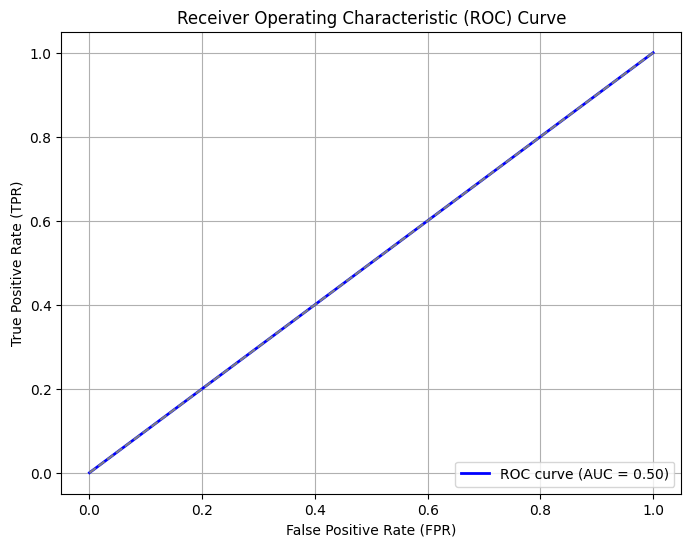

In [16]:
fpr, tpr, thresholds = roc_curve(y_test22, y_pred22)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


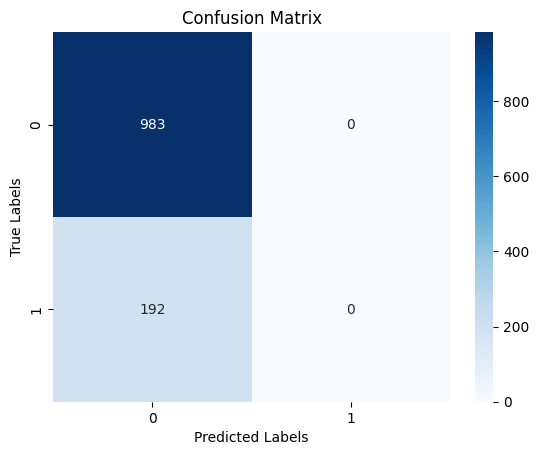

Confusion Matrix:
 [[983   0]
 [192   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       983
           1       0.00      0.00      0.00       192

    accuracy                           0.84      1175
   macro avg       0.42      0.50      0.46      1175
weighted avg       0.70      0.84      0.76      1175



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
conf_matrix = confusion_matrix(y_test22, y_pred22)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test22, y_pred22)
print("Classification Report:\n", class_report)

### Radial Basis Function

In [18]:
X = data3.drop(['total_UPDRS', 'motor_UPDRS', 'total_UPDRS'], axis = 1)
y = data3['Status']
X_train, X_test, y_train, y_test23 = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'rbf')

SVM_classifier.fit(X_train, y_train)

y_pred23 = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test23, y_pred23)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.84


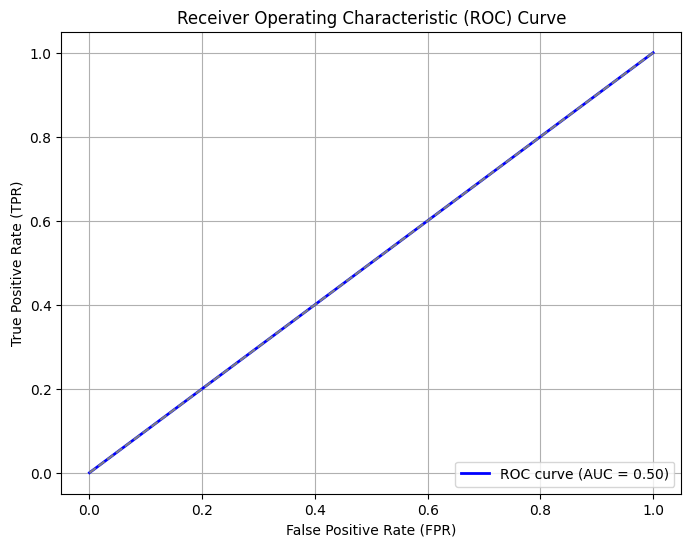

In [19]:
fpr, tpr, thresholds = roc_curve(y_test23, y_pred23)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

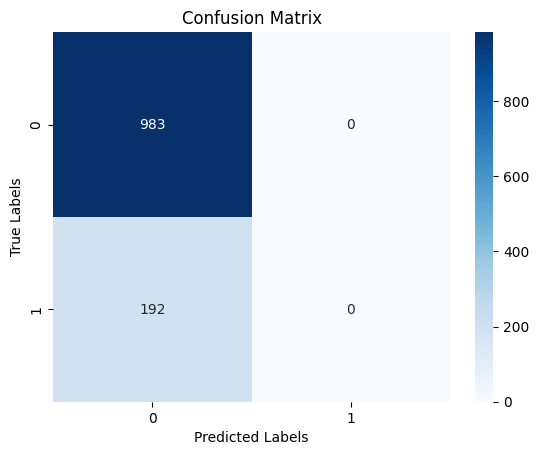

Confusion Matrix:
 [[983   0]
 [192   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       983
           1       0.00      0.00      0.00       192

    accuracy                           0.84      1175
   macro avg       0.42      0.50      0.46      1175
weighted avg       0.70      0.84      0.76      1175



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
conf_matrix = confusion_matrix(y_test23, y_pred23)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test23, y_pred23)
print("Classification Report:\n", class_report)

### Sigmoid Kernel

In [21]:
X = data3.drop(['total_UPDRS', 'motor_UPDRS', 'total_UPDRS'], axis = 1)
y = data3['Status']
X_train, X_test, y_train, y_test24 = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'sigmoid')

SVM_classifier.fit(X_train, y_train)

y_pred24 = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test24, y_pred24)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.77


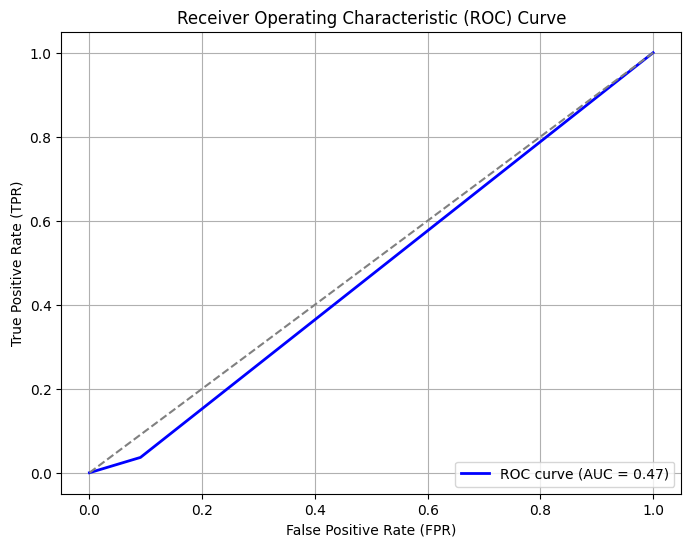

In [22]:
fpr, tpr, thresholds = roc_curve(y_test24, y_pred24)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


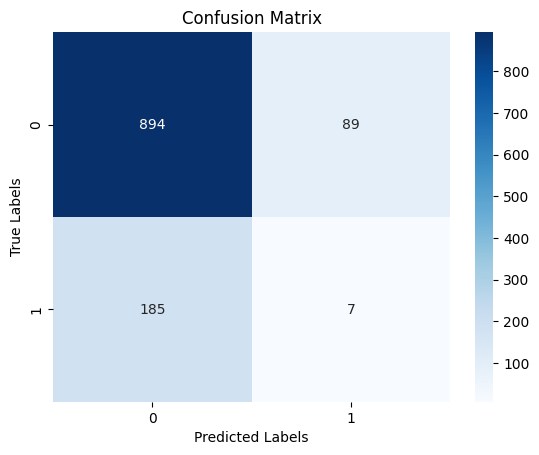

Confusion Matrix:
 [[894  89]
 [185   7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       983
           1       0.07      0.04      0.05       192

    accuracy                           0.77      1175
   macro avg       0.45      0.47      0.46      1175
weighted avg       0.71      0.77      0.73      1175



In [23]:
conf_matrix = confusion_matrix(y_test24, y_pred24)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test24, y_pred24)
print("Classification Report:\n", class_report)

## Random Forest

In [24]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
data3 = data.copy()
data3 = data3.drop(['subject#', 'test_time'], axis = 1)

### GINI Index

In [26]:
X = data3.drop(['total_UPDRS', 'motor_UPDRS', 'total_UPDRS'], axis = 1)
y = data3['Status']

X_train, X_test, y_train, y_test31 = train_test_split(X, y, test_size = 0.2, random_state = 45)

RF_Classifier = RandomForestClassifier(n_estimators = 100, random_state = 45, criterion='gini')

RF_Classifier.fit(X_train, y_train)

y_pred31 = RF_Classifier.predict(X_test)

accuracy = accuracy_score(y_test31, y_pred31)
print(f'Accuracy of the Random Forest Classifier: {accuracy:.2f}')

Accuracy of the Random Forest Classifier: 1.00


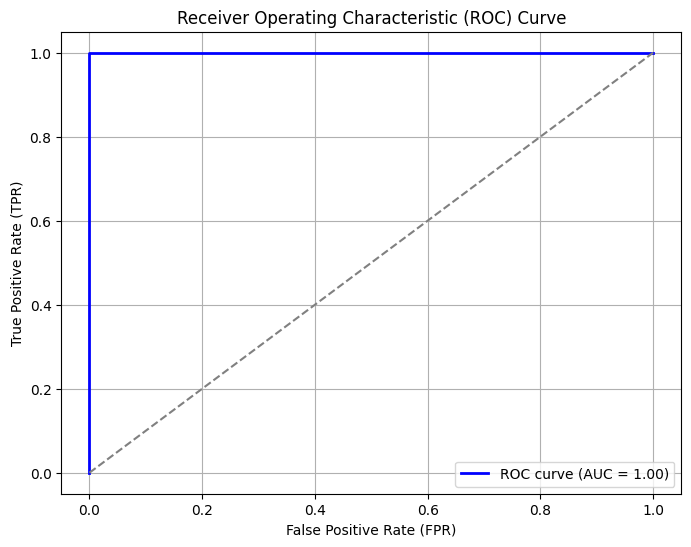

In [27]:
fpr, tpr, thresholds = roc_curve(y_test31, y_pred31)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


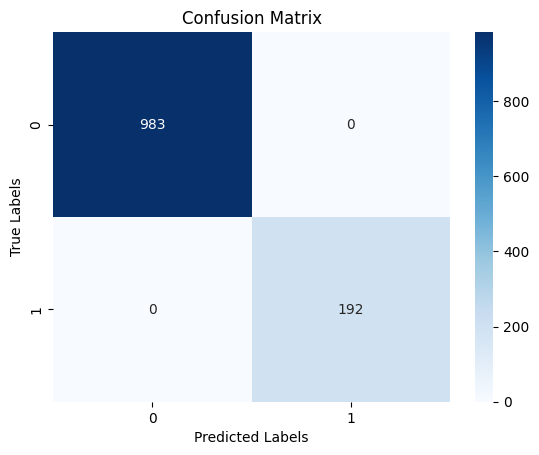

Confusion Matrix:
 [[983   0]
 [  0 192]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00       192

    accuracy                           1.00      1175
   macro avg       1.00      1.00      1.00      1175
weighted avg       1.00      1.00      1.00      1175



In [28]:
conf_matrix = confusion_matrix(y_test31, y_pred31)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test31, y_pred31)
print("Classification Report:\n", class_report)

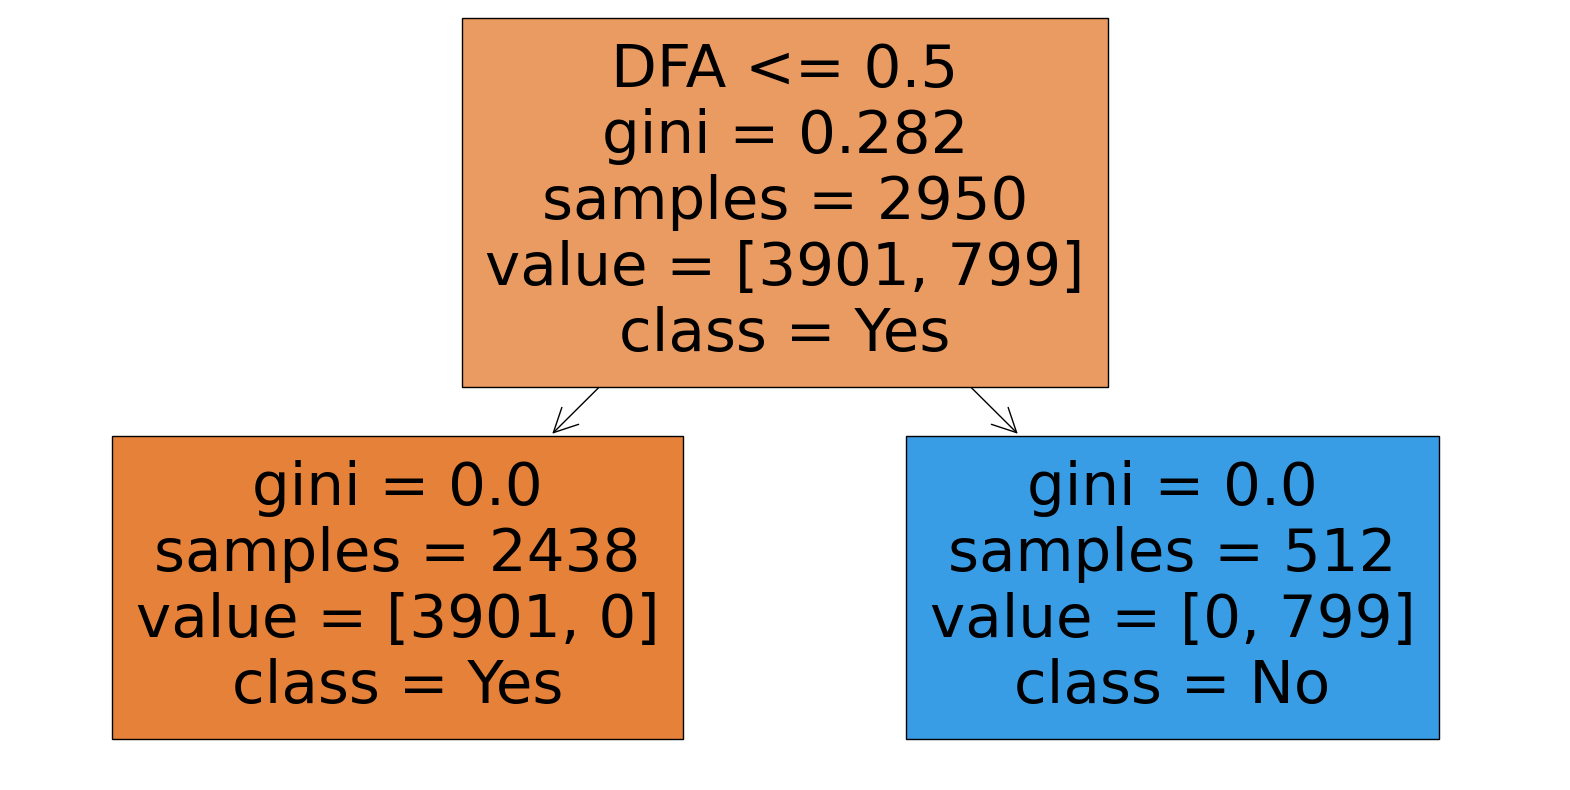

In [29]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(RF_Classifier.estimators_[0], feature_names = data3.columns, class_names = ['Yes', 'No'], filled = True)
plt.show()

### Entropy

In [30]:
X = data3.drop(['total_UPDRS', 'motor_UPDRS', 'total_UPDRS'], axis = 1)
y = data3['Status']
X_train, X_test, y_train, y_test32 = train_test_split(X, y, test_size = 0.2, random_state = 45)

RF_Classifier = RandomForestClassifier(n_estimators = 100, random_state = 45, criterion='entropy')

RF_Classifier.fit(X_train, y_train)

y_pred32 = RF_Classifier.predict(X_test)

accuracy = accuracy_score(y_test32, y_pred32)
print(f'Accuracy of the Random Forest Classifier: {accuracy:.2f}')

Accuracy of the Random Forest Classifier: 1.00


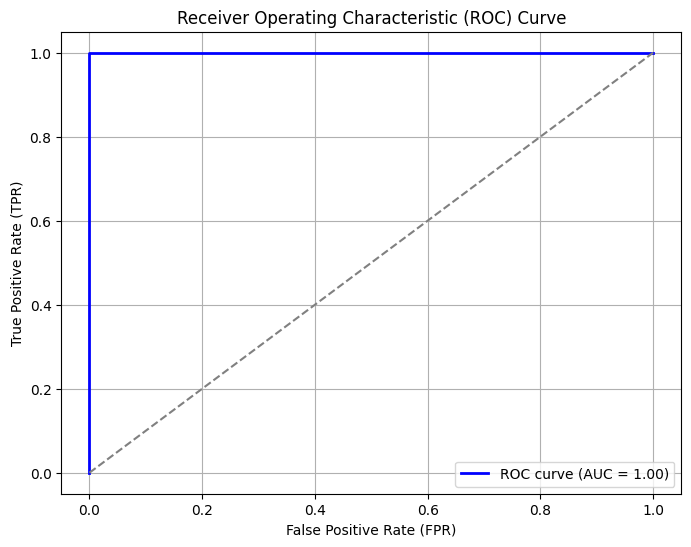

In [31]:
fpr, tpr, thresholds = roc_curve(y_test32, y_pred32)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


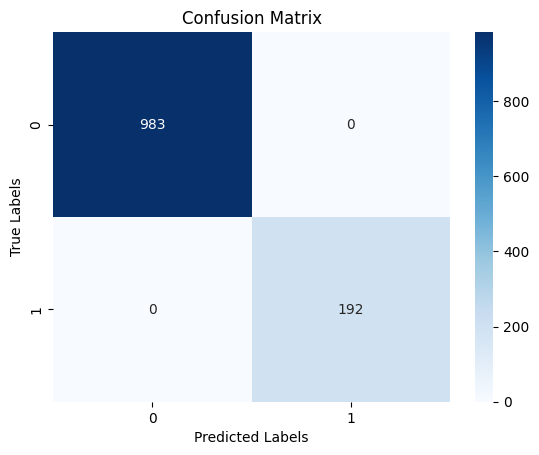

Confusion Matrix:
 [[983   0]
 [  0 192]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00       192

    accuracy                           1.00      1175
   macro avg       1.00      1.00      1.00      1175
weighted avg       1.00      1.00      1.00      1175



In [32]:
conf_matrix = confusion_matrix(y_test32, y_pred32)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test32, y_pred32)
print("Classification Report:\n", class_report)

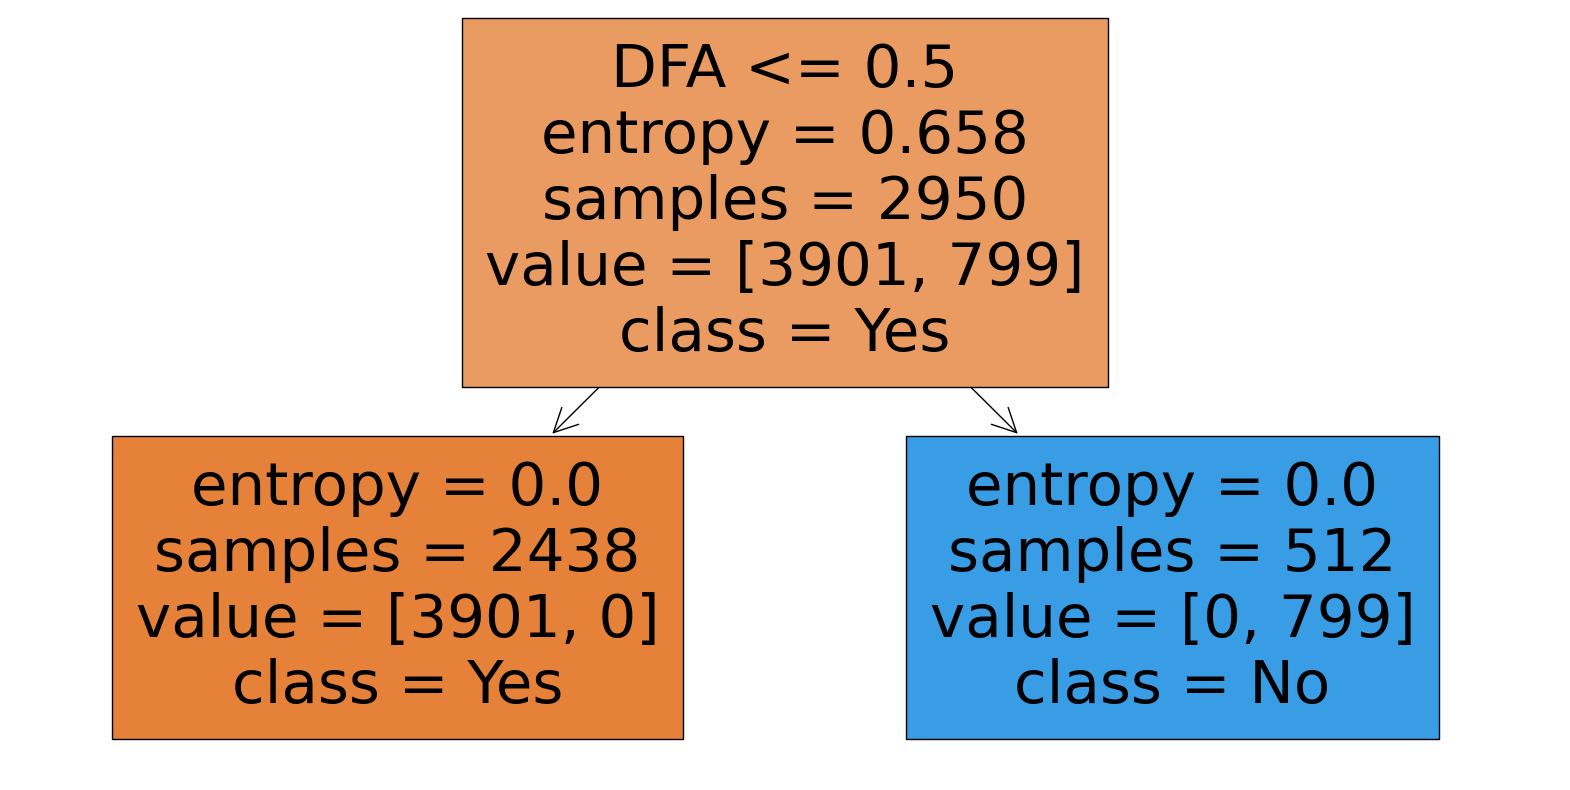

In [33]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(RF_Classifier.estimators_[0], feature_names = data3.columns, class_names = ['Yes', 'No'], filled = True)
plt.show()

## Naive Bayes

In [34]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
data3 = data.copy()
data3 = data3.drop(['subject#', 'test_time'], axis = 1)

In [36]:
X = data3.drop(['total_UPDRS', 'motor_UPDRS', 'total_UPDRS'], axis = 1)
y = data3['Status']

scaler = StandardScaler()

X_train, X_test, y_train, y_test4 = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Naive_Bayes_classifier = GaussianNB()

Naive_Bayes_classifier.fit(X_train, y_train)

y_pred4 = Naive_Bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test4, y_pred4)
print(f'Accuracy of the XGBoost Classifier: {accuracy:.2f}')

Accuracy of the XGBoost Classifier: 1.00


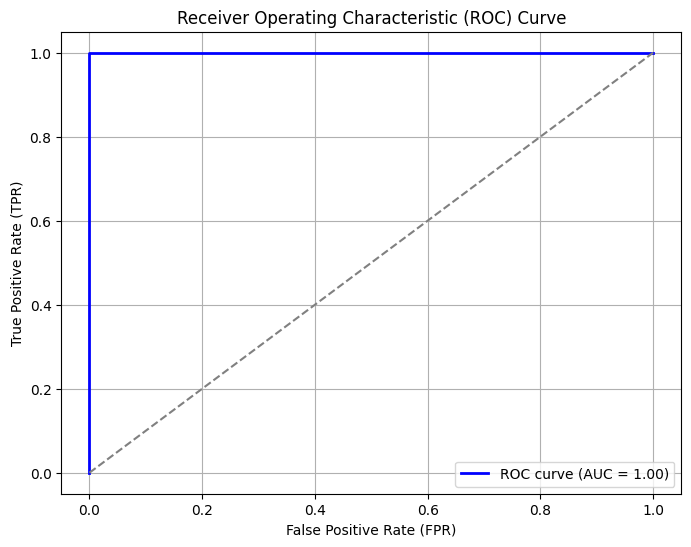

In [37]:
fpr, tpr, thresholds = roc_curve(y_test4, y_pred4)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


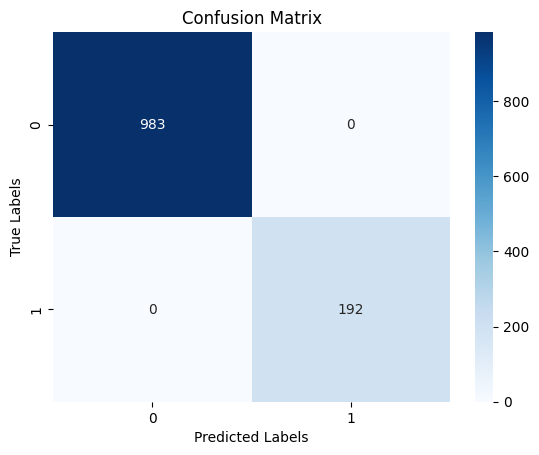

Confusion Matrix:
 [[983   0]
 [  0 192]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00       192

    accuracy                           1.00      1175
   macro avg       1.00      1.00      1.00      1175
weighted avg       1.00      1.00      1.00      1175



In [38]:
conf_matrix = confusion_matrix(y_test4, y_pred4)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test4, y_pred4)
print("Classification Report:\n", class_report)

## KNN

In [39]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
data3 = data.copy()
data3 = data3.drop(['subject#', 'test_time'], axis = 1)

In [41]:
X = data3.drop(['total_UPDRS', 'motor_UPDRS', 'total_UPDRS'], axis = 1)
y = data3['Status']

scaler = StandardScaler()

X_train, X_test, y_train, y_test5 = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train_scaled, y_train)

y_pred5 = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test5, y_pred5)
print(f'Accuracy of the KNN Classifier: {accuracy:.2f}')

Accuracy of the KNN Classifier: 1.00


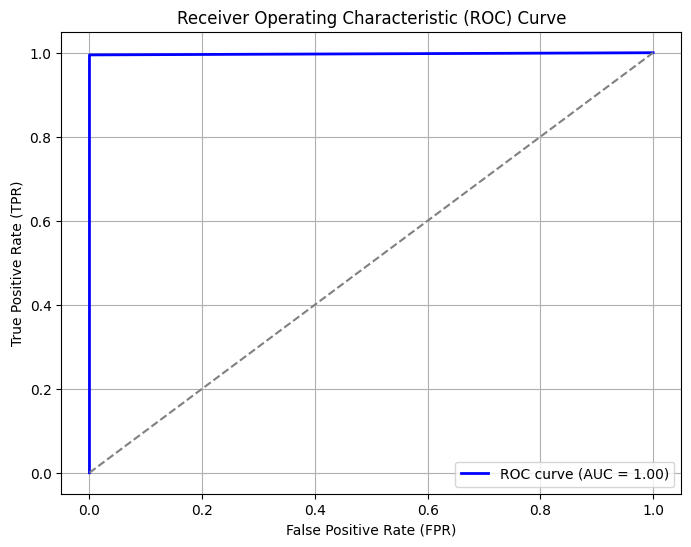

In [42]:
fpr, tpr, thresholds = roc_curve(y_test5, y_pred5)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


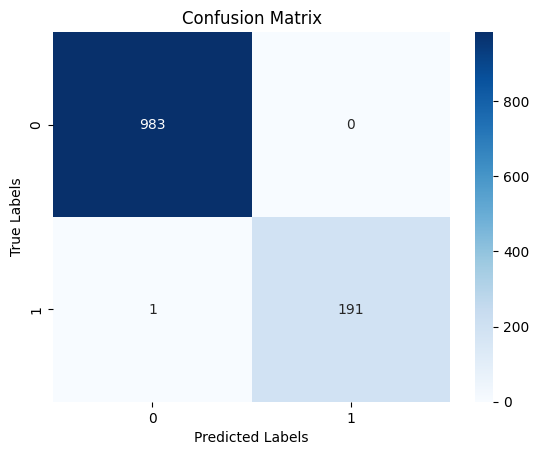

Confusion Matrix:
 [[983   0]
 [  1 191]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      0.99      1.00       192

    accuracy                           1.00      1175
   macro avg       1.00      1.00      1.00      1175
weighted avg       1.00      1.00      1.00      1175



In [43]:
conf_matrix = confusion_matrix(y_test5, y_pred5)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test5, y_pred5)
print("Classification Report:\n", class_report)

# Combined analaysis

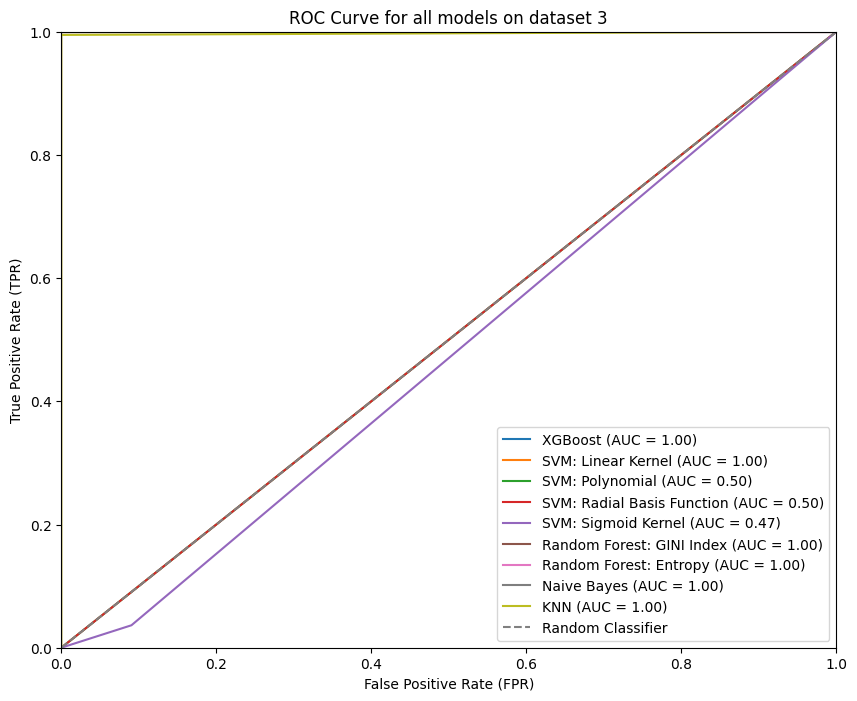

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr1, tpr1, _ = roc_curve(y_test1, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

fpr21, tpr21, _ = roc_curve(y_test21, y_pred21)
roc_auc21 = auc(fpr21, tpr21)

fpr22, tpr22, _ = roc_curve(y_test22, y_pred22)
roc_auc22 = auc(fpr22, tpr22)

fpr23, tpr23, _ = roc_curve(y_test23, y_pred23)
roc_auc23 = auc(fpr23, tpr23)

fpr24, tpr24, _ = roc_curve(y_test24, y_pred24)
roc_auc24 = auc(fpr24, tpr24)

fpr31, tpr31, _ = roc_curve(y_test31, y_pred31)
roc_auc31 = auc(fpr31, tpr31)

fpr32, tpr32, _ = roc_curve(y_test32, y_pred32)
roc_auc32 = auc(fpr32, tpr32)

fpr4, tpr4, _ = roc_curve(y_test4, y_pred4)
roc_auc4 = auc(fpr4, tpr4)

fpr5, tpr5, _ = roc_curve(y_test5, y_pred5)
roc_auc5 = auc(fpr5, tpr5)

plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, label=f'XGBoost (AUC = {roc_auc1:.2f})')
plt.plot(fpr21, tpr21, label=f'SVM: Linear Kernel (AUC = {roc_auc21:.2f})')
plt.plot(fpr22, tpr22, label=f'SVM: Polynomial (AUC = {roc_auc22:.2f})')
plt.plot(fpr23, tpr23, label=f'SVM: Radial Basis Function (AUC = {roc_auc23:.2f})')
plt.plot(fpr24, tpr24, label=f'SVM: Sigmoid Kernel (AUC = {roc_auc24:.2f})')
plt.plot(fpr31, tpr31, label=f'Random Forest: GINI Index (AUC = {roc_auc31:.2f})')
plt.plot(fpr32, tpr32, label=f'Random Forest: Entropy (AUC = {roc_auc32:.2f})')
plt.plot(fpr4, tpr4, label=f'Naive Bayes (AUC = {roc_auc4:.2f})')
plt.plot(fpr5, tpr5, label=f'KNN (AUC = {roc_auc5:.2f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for all models on dataset 3')
plt.legend(loc='lower right')
plt.show()